## Esercitazione 7 -  9 Aprile 2024

## Esercizio 2


Calcolare il punto di minimo delle seguenti due funzioni 
   $$f_1(x, y) = \frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ f_2(x, y) =(x^2 - y^2)^2 + (x - 1)^2$$
   $$ f_3(x, y) = \sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)\cos(2x-e^y)$$




$$
f_4(x, y) = x^2 + y^2 - 2xy + 2x - 4y + 1
$$


$$ f_5(x, y) = e^{- \frac{x^2 + y^2}{4}} $$



$$
f_6(x, y) = \frac{1}{2}(x^2 - y)^2 + \frac{1}{2}(x - 1)^2
$$



$$
f_7(x, y) = \sin(x) \cos(y) + \frac{x^2 + y^2}{2}
$$



$$
f_8(x, y) = \log(x^2 + y^2 + 1) + \frac{1}{x^2 + y^2 + 1}
$$









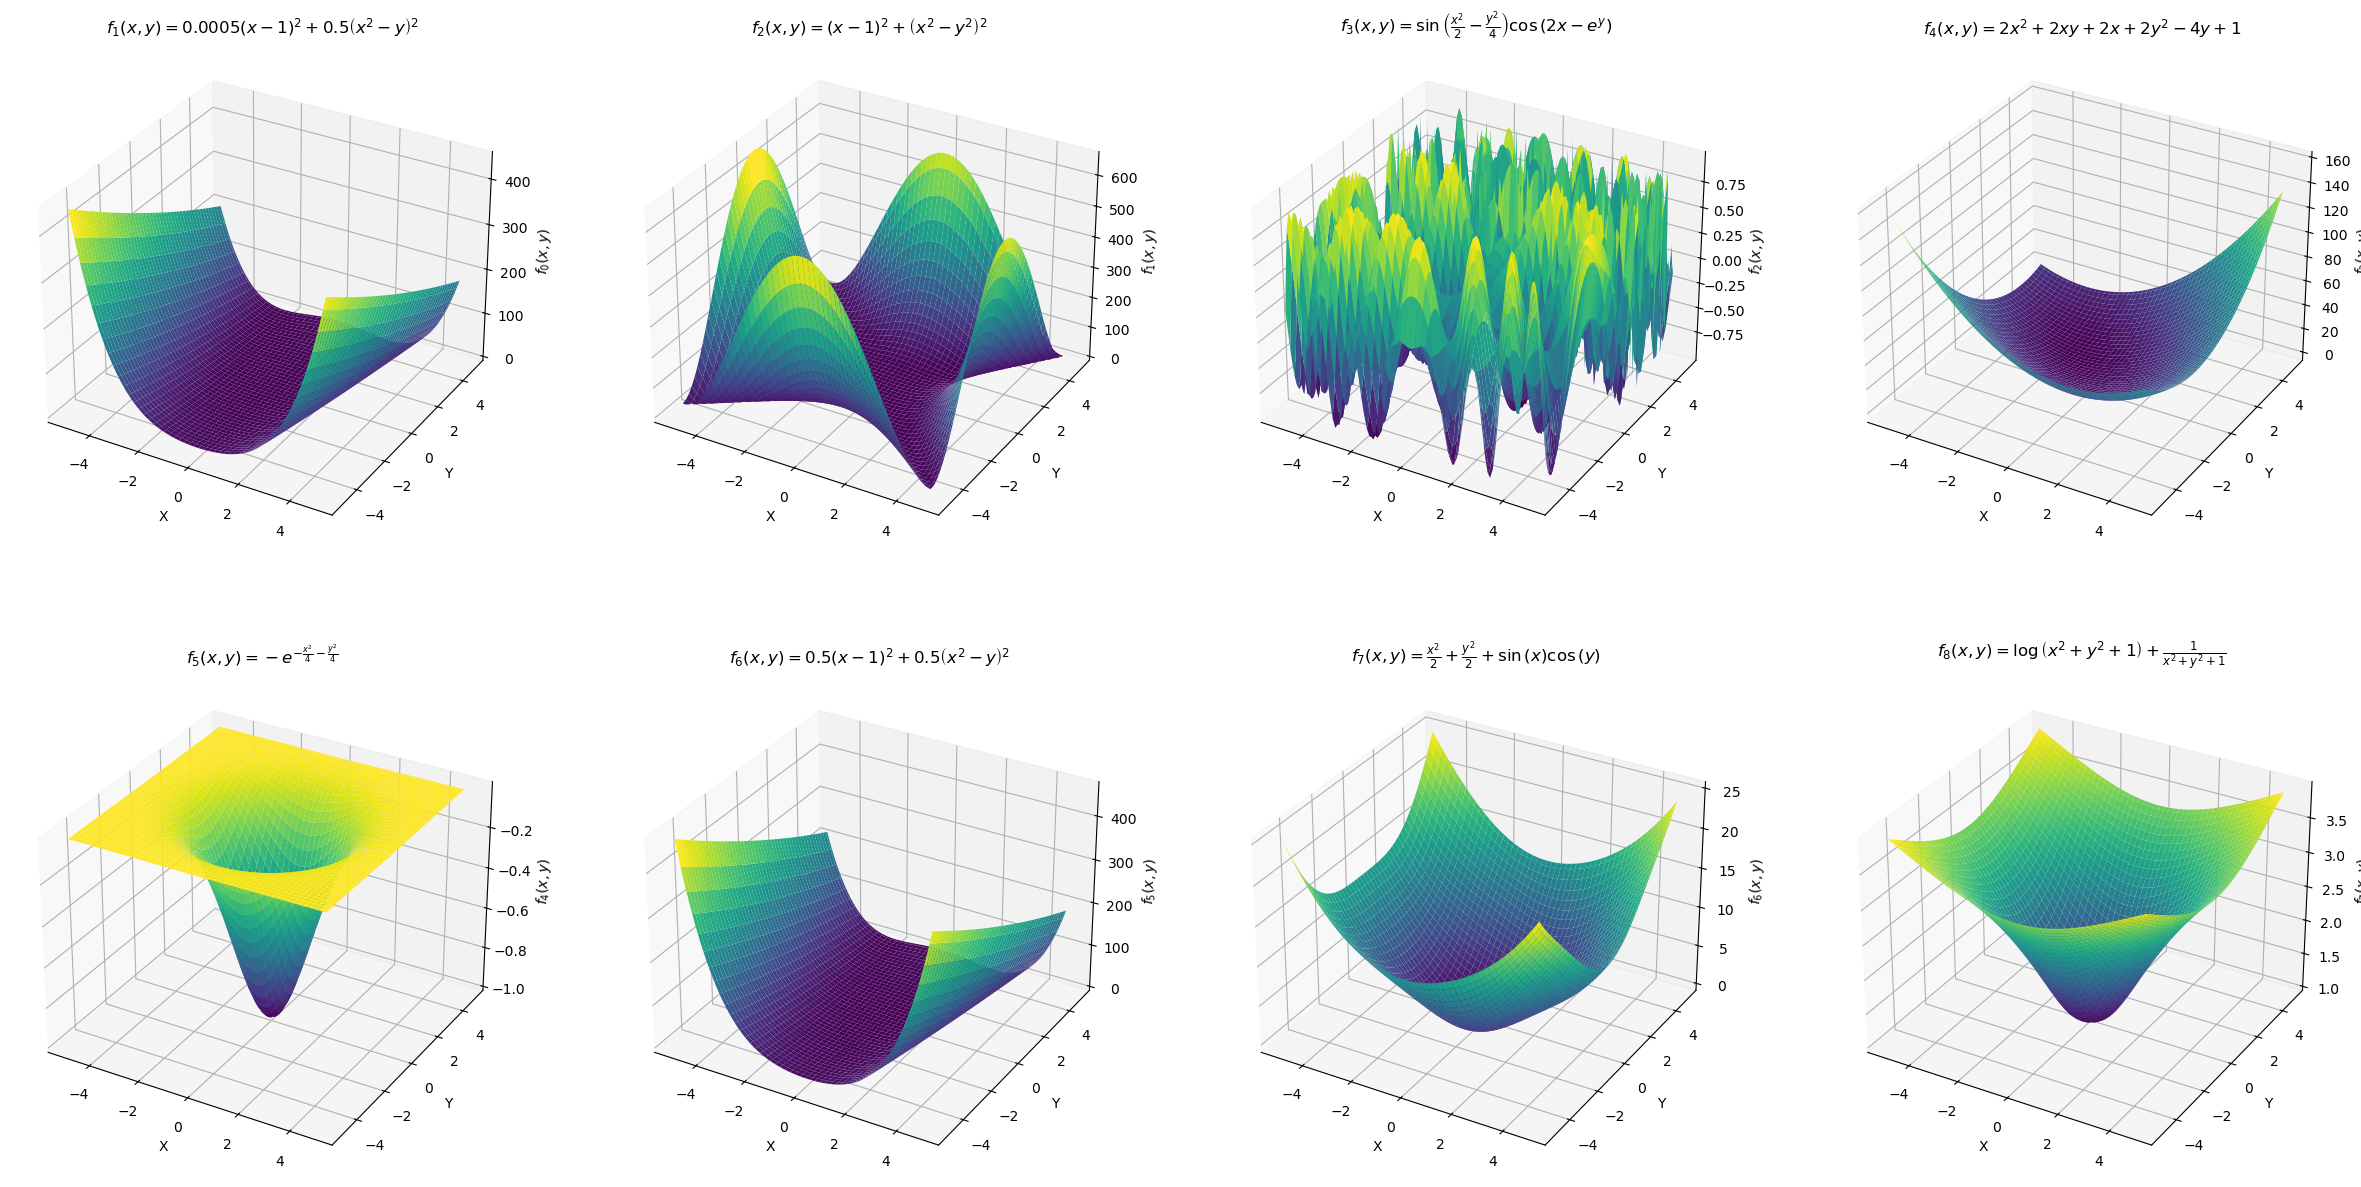

In [6]:
import sympy as sym
import numpy as np
import numpy.linalg as npl
import math
import sys, os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Scheletri'))

import Schel_FULL as sf

x, y = sym.symbols('x, y')

xx = np.arange(-5.0, 5.0, 0.1)
yy = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(xx, yy)

f1 = 1/2 * (0.001*(x-1)**2 + (x**2 - y)**2)
f2 = (x**2 - y**2)**2 + (x-1)**2
f3 = sym.sin((x**2)/2 - (y**2)/4)*sym.cos(2*x - sym.exp(y))
f4 = 2*x**2 + 2*y**2 +2*x*y + 2*x -4*y +1
f5 = -sym.exp(-(x**2 + y**2)/4)
f6 = 0.5*(x**2 - y)**2 + 0.5 * (x-1)**2
f7 = sym.sin(x)*sym.cos(y)+(x**2 + y**2)/2
f8 = sym.log(x**2 + y**2 +1)+ (1)/(x**2 + y**2 + 1)

fun_syms = [f1, f2, f3, f4, f5, f6, f7, f8]
functions = [sym.lambdify((x, y), f, np) for f in fun_syms]

fig, ax = plt.subplots(2, 4, figsize= (30, 15), subplot_kw = {'projection': '3d'})
ax = ax.flatten()

for i, box in enumerate(ax):
    Z = functions[i](X, Y)
    box.plot_surface(X, Y, Z, cmap = 'viridis')
    box.set_title(f'$f_{i+1}(x, y) = {sym.latex(fun_syms[i])}$')
    box.set_xlabel('X')
    box.set_ylabel('Y')
    box.set_zlabel(f'$f_{i}(x,y)$')

1 : [1. 1.]
2 : [5.89754512e-01 1.48590366e-12]
3 : [-4.17330795  3.99792979]
4 : [-1.33333333  1.66666667]
5 : [0. 0.]
6 : [1. 1.]
7 : [-0.73908513  0.        ]
8 : [0.00018475 0.00018475]


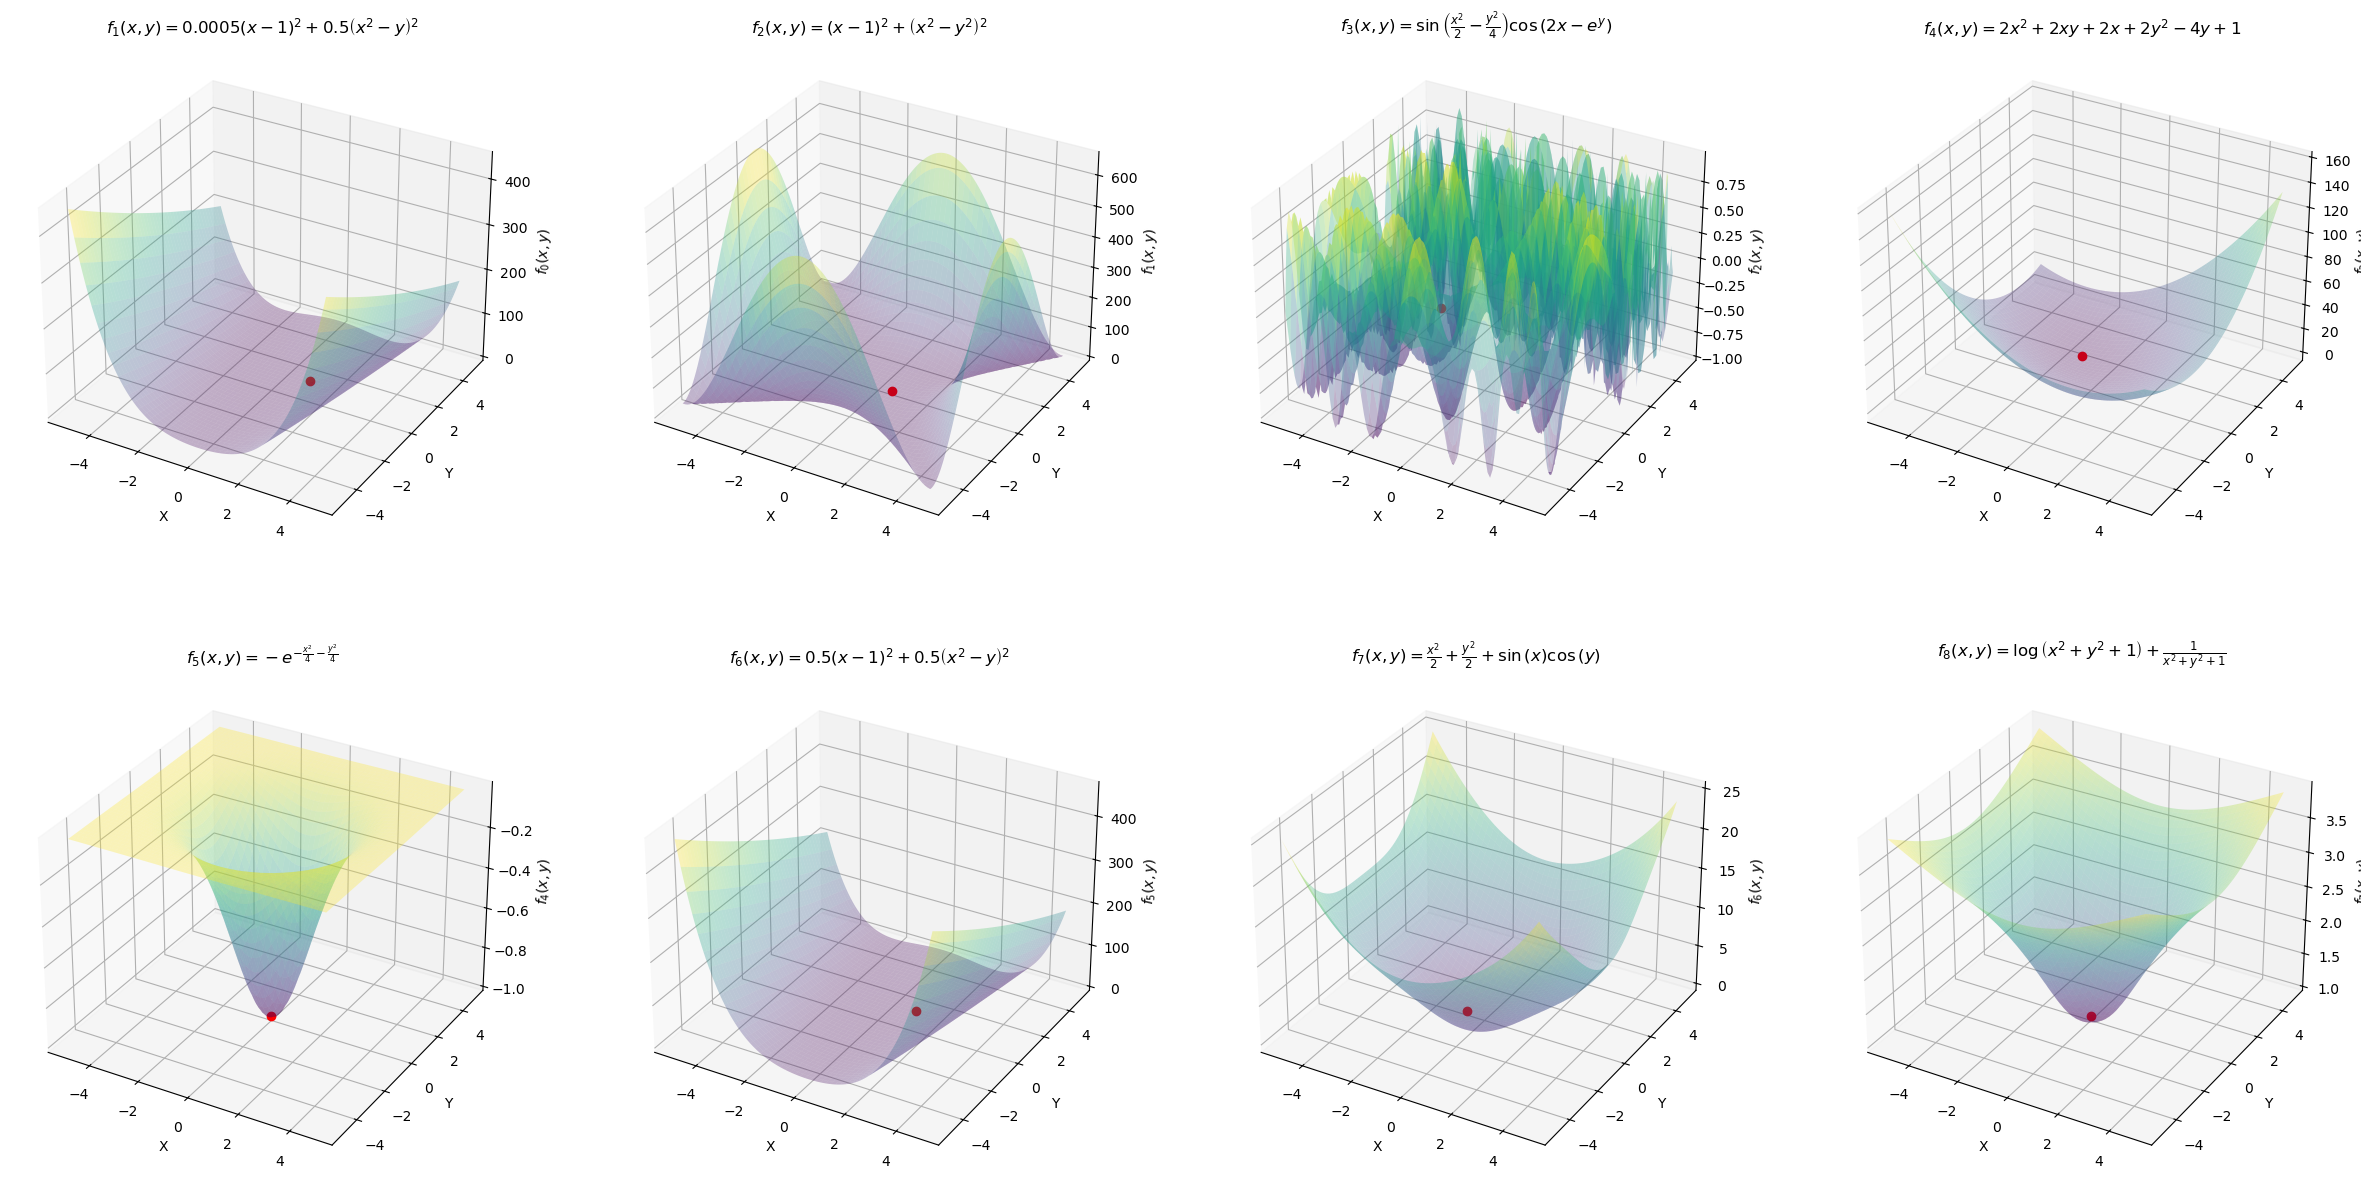

In [13]:
def gradient(fun_sym, varlist):
    grad_sym = [sym.diff(fun_sym, var) for var in varlist]
    grad = sym.lambdify(varlist, grad_sym, np)
    return lambda args : grad(*args)

def hessian(fun_sym, varlist):
    hess_sym = sym.hessian(fun_sym, varlist)
    hess = sym.lambdify(varlist, hess_sym, np)
    return lambda args : hess(*args)

tolx, tolf = (1e-10, 1e-10)

maxit = 1000

x0s = np.array([
    [0,0],
    [1,2],
    [-4,4],
    [4,-4],
    [0,0],
    [0,0],
    [0,0],
    [0.2,0.2]
])

fig, ax = plt.subplots(2, 4, figsize= (30, 15), subplot_kw = {'projection': '3d'})
ax = ax.flatten()

for i, box in enumerate(ax):
    Z = functions[i](X, Y)
    box.plot_surface(X, Y, Z, cmap = 'viridis', alpha = 0.3)
    box.set_title(f'$f_{i+1}(x, y) = {sym.latex(fun_syms[i])}$')
    box.set_xlabel('X')
    box.set_ylabel('Y')
    box.set_zlabel(f'$f_{i}(x,y)$')

    sol, numit, norm = sf.my_newton_minimo(gradient(fun_syms[i], (x,y)), hessian(fun_syms[i], (x,y)), x0s[i], tolx, tolf, maxit)

    print(f'{i+1} : {sol}')

    box.plot(sol[0], sol[1], functions[i](sol[0], sol[1]), 'ro')

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [16]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])

print("my norma 2 = ", math.sqrt(np.max(npl.eigvals(A.T@A))))
print("Norma 2 = ",npl.norm(A, 2))

my norma 2 =  9.056251013341882
Norma 2 =  9.05625101334188
